In [145]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt
import scipy.stats as stats
from scipy.stats import norm, skew #for some statistics
import re

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.use('tkagg')
from mlxtend.plotting import plot_confusion_matrix

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# For building model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_mldata
from sklearn import metrics
from RegscorePy import *
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [137]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [2]:
cd E:\Machine_Learning\Telecom_Churn_Case_Study

E:\Machine_Learning\Telecom_Churn_Case_Study


In [3]:
#reading the telecom dataset
telecom = pd.read_csv("telecom_churn_data.csv",  sep = ',',encoding = "ISO-8859-1")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.000,1.000,1.000,nan,968,30.400,0.000,101.200,3.580
1,7001865778,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,nan,1.000,1.000,nan,1006,0.000,0.000,0.000,0.000
2,7001625959,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,nan,nan,nan,1.000,1103,0.000,0.000,4.170,0.000
3,7001204172,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,nan,nan,nan,nan,2491,0.000,0.000,0.000,0.000
4,7000142493,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.000,nan,nan,nan,1526,0.000,0.000,0.000,0.000


In [4]:
#Remove columns which has only one unique value

telecom= telecom.loc[:,telecom.nunique()!=1]
telecom.shape

(99999, 210)

In [5]:
# Finding the date columns in the dataframe(type = categorical)
date_columns = telecom.dtypes[telecom.dtypes == "object"].index
date_columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [6]:
# Extracting the 'day' from date
telecom['date_of_last_rech_6'] =  pd.to_datetime(telecom['date_of_last_rech_6'], format='%m/%d/%Y').dt.day
telecom['date_of_last_rech_7'] =  pd.to_datetime(telecom['date_of_last_rech_7'], format='%m/%d/%Y').dt.day
telecom['date_of_last_rech_8'] =  pd.to_datetime(telecom['date_of_last_rech_8'], format='%m/%d/%Y').dt.day
telecom['date_of_last_rech_9'] =  pd.to_datetime(telecom['date_of_last_rech_9'], format='%m/%d/%Y').dt.day

telecom['date_of_last_rech_data_6'] =  pd.to_datetime(telecom['date_of_last_rech_data_6'], format='%m/%d/%Y').dt.day
telecom['date_of_last_rech_data_7'] =  pd.to_datetime(telecom['date_of_last_rech_data_7'], format='%m/%d/%Y').dt.day
telecom['date_of_last_rech_data_8'] =  pd.to_datetime(telecom['date_of_last_rech_data_8'], format='%m/%d/%Y').dt.day
telecom['date_of_last_rech_data_9'] =  pd.to_datetime(telecom['date_of_last_rech_data_9'], format='%m/%d/%Y').dt.day

telecom[date_columns].dtypes

date_of_last_rech_6         float64
date_of_last_rech_7         float64
date_of_last_rech_8         float64
date_of_last_rech_9         float64
date_of_last_rech_data_6    float64
date_of_last_rech_data_7    float64
date_of_last_rech_data_8    float64
date_of_last_rech_data_9    float64
dtype: object

In [7]:
# Inspecting the date columns after transformation
telecom[date_columns].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,21.000,16.000,8.000,28.000,21.000,16.000,8.000,nan
1,29.000,31.000,28.000,30.000,nan,25.000,10.000,nan
2,17.000,24.000,14.000,29.000,nan,nan,nan,17.000
3,28.000,31.000,31.000,30.000,nan,nan,nan,nan
4,26.000,28.000,9.000,28.000,4.000,nan,nan,nan


In [8]:
# Ensuring there are no categorical columns left in the dataframe
cols = telecom.columns
num_cols = telecom._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [9]:

# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(telecom.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(telecom.isnull().sum()/telecom.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
night_pck_user_6,74846,74.850
arpu_2g_6,74846,74.850
count_rech_3g_6,74846,74.850
av_rech_amt_data_6,74846,74.850
count_rech_2g_6,74846,74.850
max_rech_data_6,74846,74.850
fb_user_6,74846,74.850
date_of_last_rech_data_6,74846,74.850
total_rech_data_6,74846,74.850
arpu_3g_6,74846,74.850


In [11]:
# Selecting columns with null values
columns_null = total.loc[total['Total'] >= 0].index
columns_null

Index(['night_pck_user_6', 'arpu_2g_6', 'count_rech_3g_6',
       'av_rech_amt_data_6', 'count_rech_2g_6', 'max_rech_data_6', 'fb_user_6',
       'date_of_last_rech_data_6', 'total_rech_data_6', 'arpu_3g_6',
       ...
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9',
       'mobile_number'],
      dtype='object', length=210)

In [12]:

# Filling all null values with 0
telecom[columns_null] = telecom[columns_null].fillna(0)

In [13]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(telecom.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(telecom.isnull().sum()/telecom.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
sep_vbc_3g,0,0.000
std_og_t2f_mou_9,0,0.000
loc_ic_t2t_mou_9,0,0.000
loc_ic_t2t_mou_8,0,0.000
loc_ic_t2t_mou_7,0,0.000


In [14]:
#identification of high value customers -->Customers who recharged with an amount of 70%ile of June and July
# Total call and data recharge for a month = total call recharge amount + Avg data recharge amount*total no of data recharges
telecom['total_data_and_call_rech_6'] = telecom["total_rech_amt_6"] + telecom['av_rech_amt_data_6']*telecom['total_rech_data_6']
telecom['total_data_and_call_rech_7'] = telecom['total_rech_amt_7'] + telecom['av_rech_amt_data_7']*telecom['total_rech_data_7']
telecom['total_data_and_call_rech_8'] = telecom['total_rech_amt_8'] + telecom['av_rech_amt_data_8']*telecom['total_rech_data_8']

# Average recharge amount for June and July = (Total call and data recharge for June + Total call and data recharge for July)/2
telecom['avg_rech_6_&_7'] = (telecom['total_data_and_call_rech_6'] + telecom['total_data_and_call_rech_7'])/2
telecom[['total_rech_amt_6','av_rech_amt_data_6','total_rech_data_6','total_data_and_call_rech_6','total_rech_amt_7','av_rech_amt_data_7','total_rech_data_7','total_data_and_call_rech_7','avg_rech_6_&_7','total_data_and_call_rech_8']].head()

,total_rech_amt_6,av_rech_amt_data_6,total_rech_data_6,total_data_and_call_rech_6,total_rech_amt_7,av_rech_amt_data_7,total_rech_data_7,total_data_and_call_rech_7,avg_rech_6_&_7,total_data_and_call_rech_8
0,362,252.000,1.000,614.000,252,252.000,1.000,504.000,559.000,504.000
1,74,0.000,0.000,74.000,384,154.000,1.000,538.000,306.000,383.000
2,168,0.000,0.000,168.000,315,0.000,0.000,315.000,241.500,116.000
3,230,0.000,0.000,230.000,310,0.000,0.000,310.000,270.000,601.000
4,196,56.000,1.000,252.000,350,0.000,0.000,350.000,301.000,287.000


In [15]:
# Calculating X
# X is the 70th percentile of the average recharge amount in the first two months - June and July
X = telecom['avg_rech_6_&_7'].quantile(0.7)
X

478.0

In [16]:

# Filtering high value customers
telecom = telecom.loc[telecom['avg_rech_6_&_7'] >= telecom['avg_rech_6_&_7'].quantile(0.7)]
telecom.shape

(30001, 214)

In [17]:

# Dropping all the extra columns
columns_drop = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'
                 ,'total_rech_data_6','total_rech_data_7','total_rech_data_8']
columns_drop

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

In [18]:
telecom = telecom.drop(columns_drop, axis=1)
telecom.shape

(30001, 205)

In [19]:
#Tag customers with no incoming and outgoing calls and have not used mobile internet even once in churn month 4
# Selecting columns for churn calculation
churn_columns = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
churn_columns

['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [20]:
# Calculating total call and data charges for September
telecom['total_calls_&_data_9'] = telecom['total_ic_mou_9'] + telecom['total_og_mou_9'] + telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']
telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','total_calls_&_data_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,total_calls_&_data_9
0,0.000,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000,0.000
8,34.910,142.180,0.000,0.000,177.090
21,252.610,1031.530,0.000,0.000,1284.140
23,127.480,127.630,13.930,314.740,583.780


In [21]:
# Calculating Churn. If total amount = 0, then churn, else non churn
telecom['churn'] = telecom['total_calls_&_data_9'].apply(lambda x:1 if x==0 else 0)
telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','total_calls_&_data_9','churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,total_calls_&_data_9,churn
0,0.000,0.000,0.000,0.000,0.000,1
7,0.000,0.000,0.000,0.000,0.000,1
8,34.910,142.180,0.000,0.000,177.090,0
21,252.610,1031.530,0.000,0.000,1284.140,0
23,127.480,127.630,13.930,314.740,583.780,0


In [22]:

# removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
cols = [c for c in telecom.columns if c[-2:] != '_9']
telecom=telecom[cols]
telecom = telecom.drop('sep_vbc_3g', axis=1)
telecom.shape

(30001, 154)

In [23]:

# Re inspecting total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(telecom.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(telecom.isnull().sum()/telecom.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
churn,0,0.000
spl_og_mou_8,0,0.000
loc_ic_t2t_mou_6,0,0.000
total_og_mou_8,0,0.000
total_og_mou_7,0,0.000


In [24]:
telecom.to_csv("telecom1.csv", sep=',')

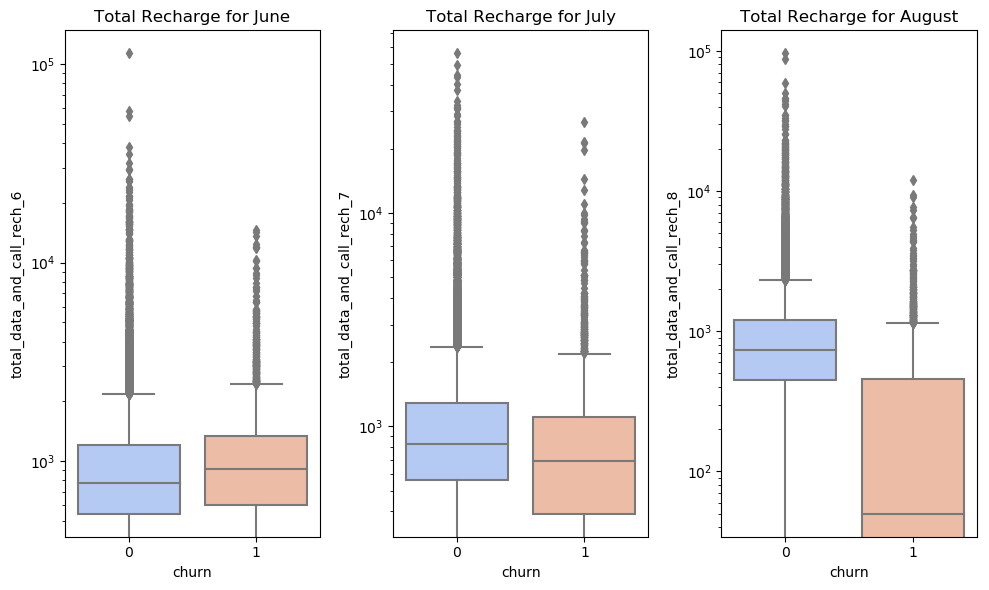

In [25]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k', frameon='True')

# subplot 1
plt.subplot(1, 3, 1)
sns.boxplot(x='churn', y='total_data_and_call_rech_6', palette='coolwarm', data=telecom)
# setting y scale as log y
plt.yscale('log')
# plot title
plt.title("Total Recharge for June")

# subplot 2
plt.subplot(1, 3, 2)
sns.boxplot(x='churn', y='total_data_and_call_rech_7', palette='coolwarm', data=telecom)
# setting y scale as log y
plt.yscale('log')
# plot title
plt.title("Total Recharge for July")

# subplot 3
plt.subplot(1, 3, 3)
sns.boxplot(x='churn', y='total_data_and_call_rech_8', palette='coolwarm', data=telecom)
# setting y scale as log y
plt.yscale('log')
# plot title
plt.title("Total Recharge for August")

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

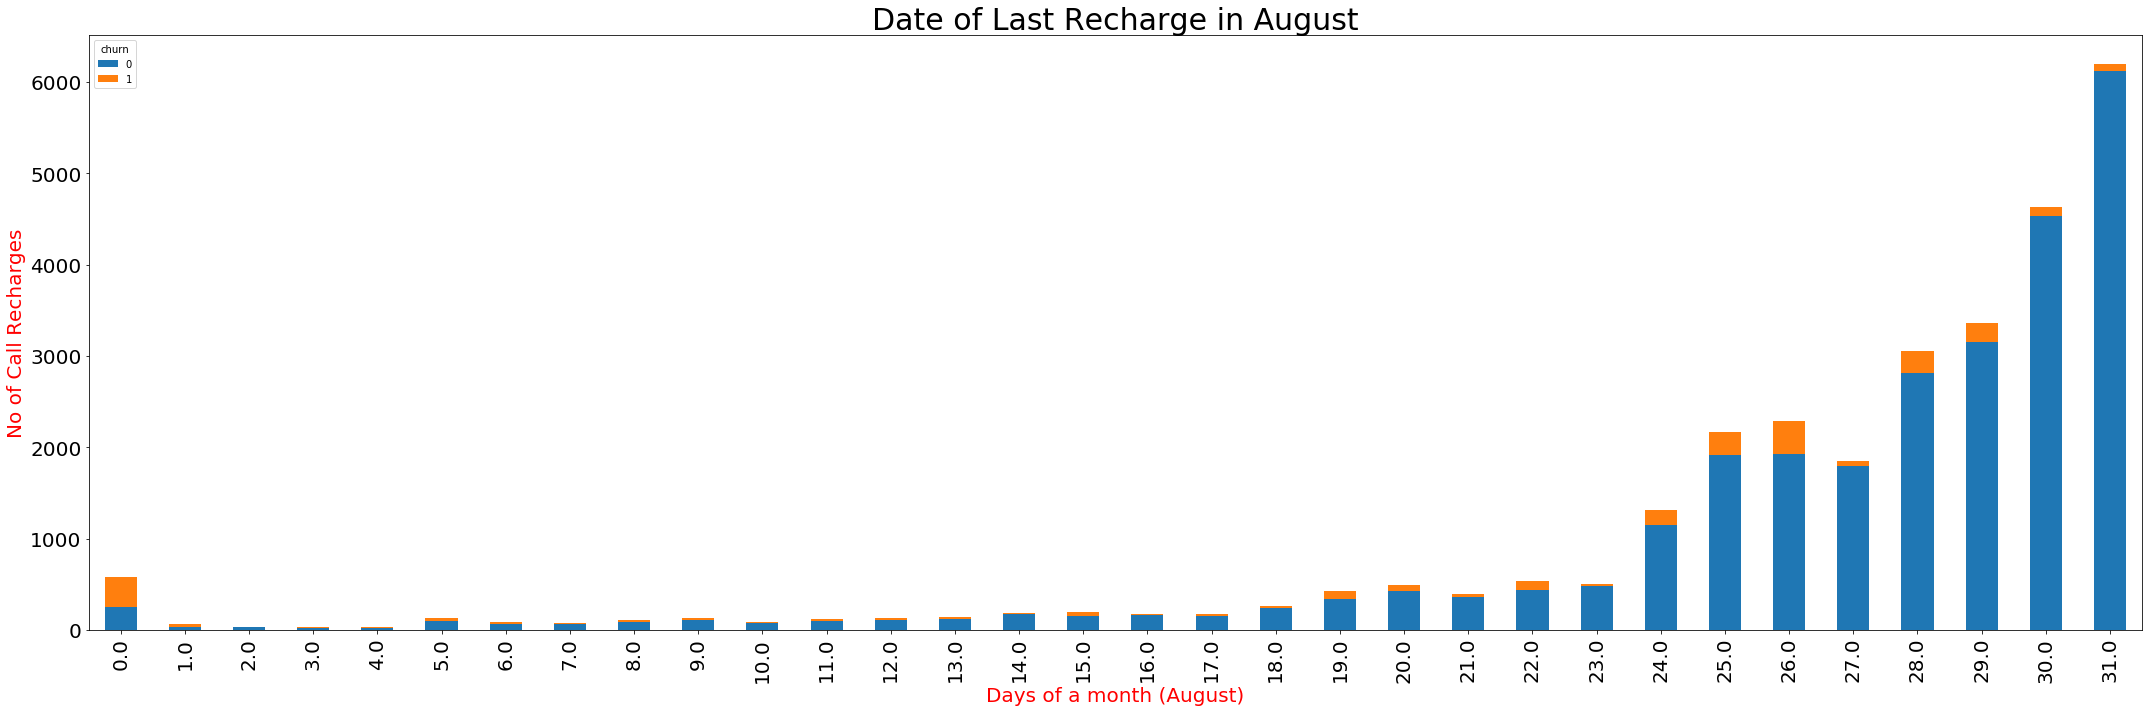

In [26]:

telecom.groupby(["date_of_last_rech_8", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10), fontsize = 20) 
# plot title
plt.title("Date of Last Recharge in August", fontsize = 30)
# plot x axis label
plt.xlabel('Days of a month (August)', fontsize = 20, color='r')
# plot y axis label
plt.ylabel('No of Call Recharges', fontsize = 20, color='r')

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

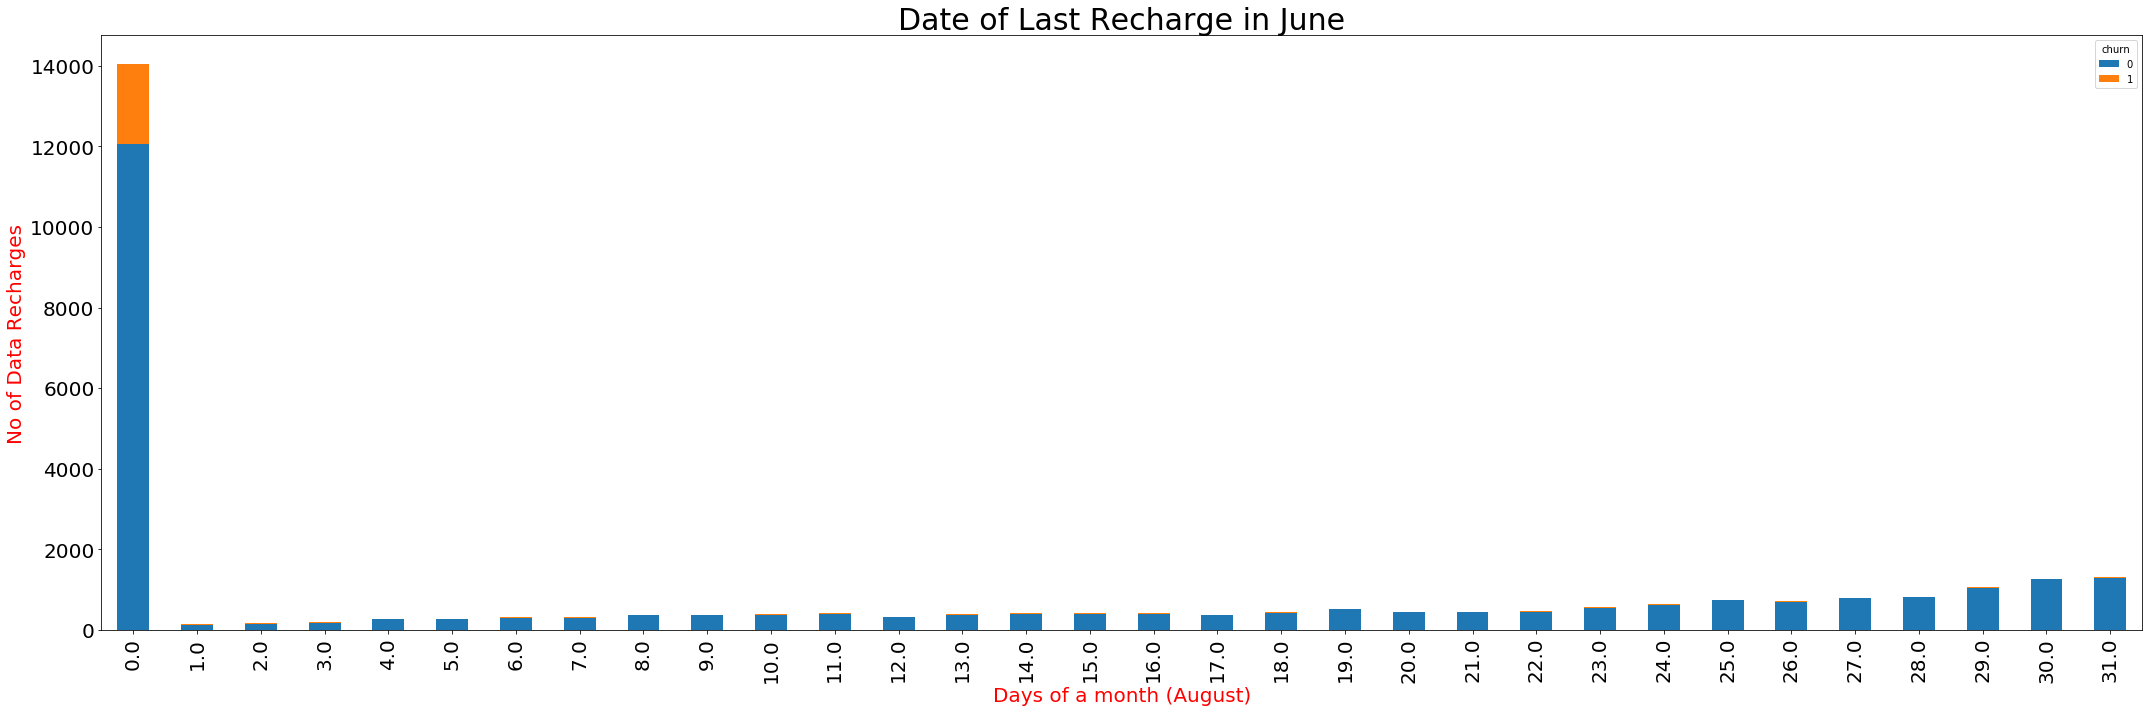

In [27]:
telecom.groupby(["date_of_last_rech_data_8", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10), fontsize = 20) 
# plot title
plt.title("Date of Last Recharge in June", fontsize = 30)
# plot x axis label
plt.xlabel('Days of a month (August)', fontsize = 20, color='r')
# plot y axis label
plt.ylabel('No of Data Recharges', fontsize = 20, color='r')

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [29]:
cols = [c for c in telecom.columns if c[-2:] == '_8']
telecom_8=telecom[cols]
telecom_8.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,total_data_and_call_rech_8
0,213.803,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,109.610,212.170,212.170,0.000,0,0,1,0,1.000,504.000
7,3171.480,52.290,325.910,31.640,38.060,40.280,162.280,53.230,0.000,255.790,...,0.000,0.000,0.000,0.000,0,0,0,0,0.000,3638.000
8,137.362,35.080,136.480,0.000,0.000,12.490,50.540,0.000,7.150,63.040,...,11.940,19.830,0.000,0.000,0,3,0,0,1.000,327.000
21,637.760,85.140,983.390,0.000,0.000,23.340,104.810,1.580,0.000,129.740,...,0.000,0.000,0.000,0.000,0,0,0,0,0.000,718.000
23,366.966,33.580,205.890,0.000,0.000,33.580,148.560,0.000,17.710,182.140,...,1009.920,197.270,150.670,0.000,0,0,1,1,1.000,979.000


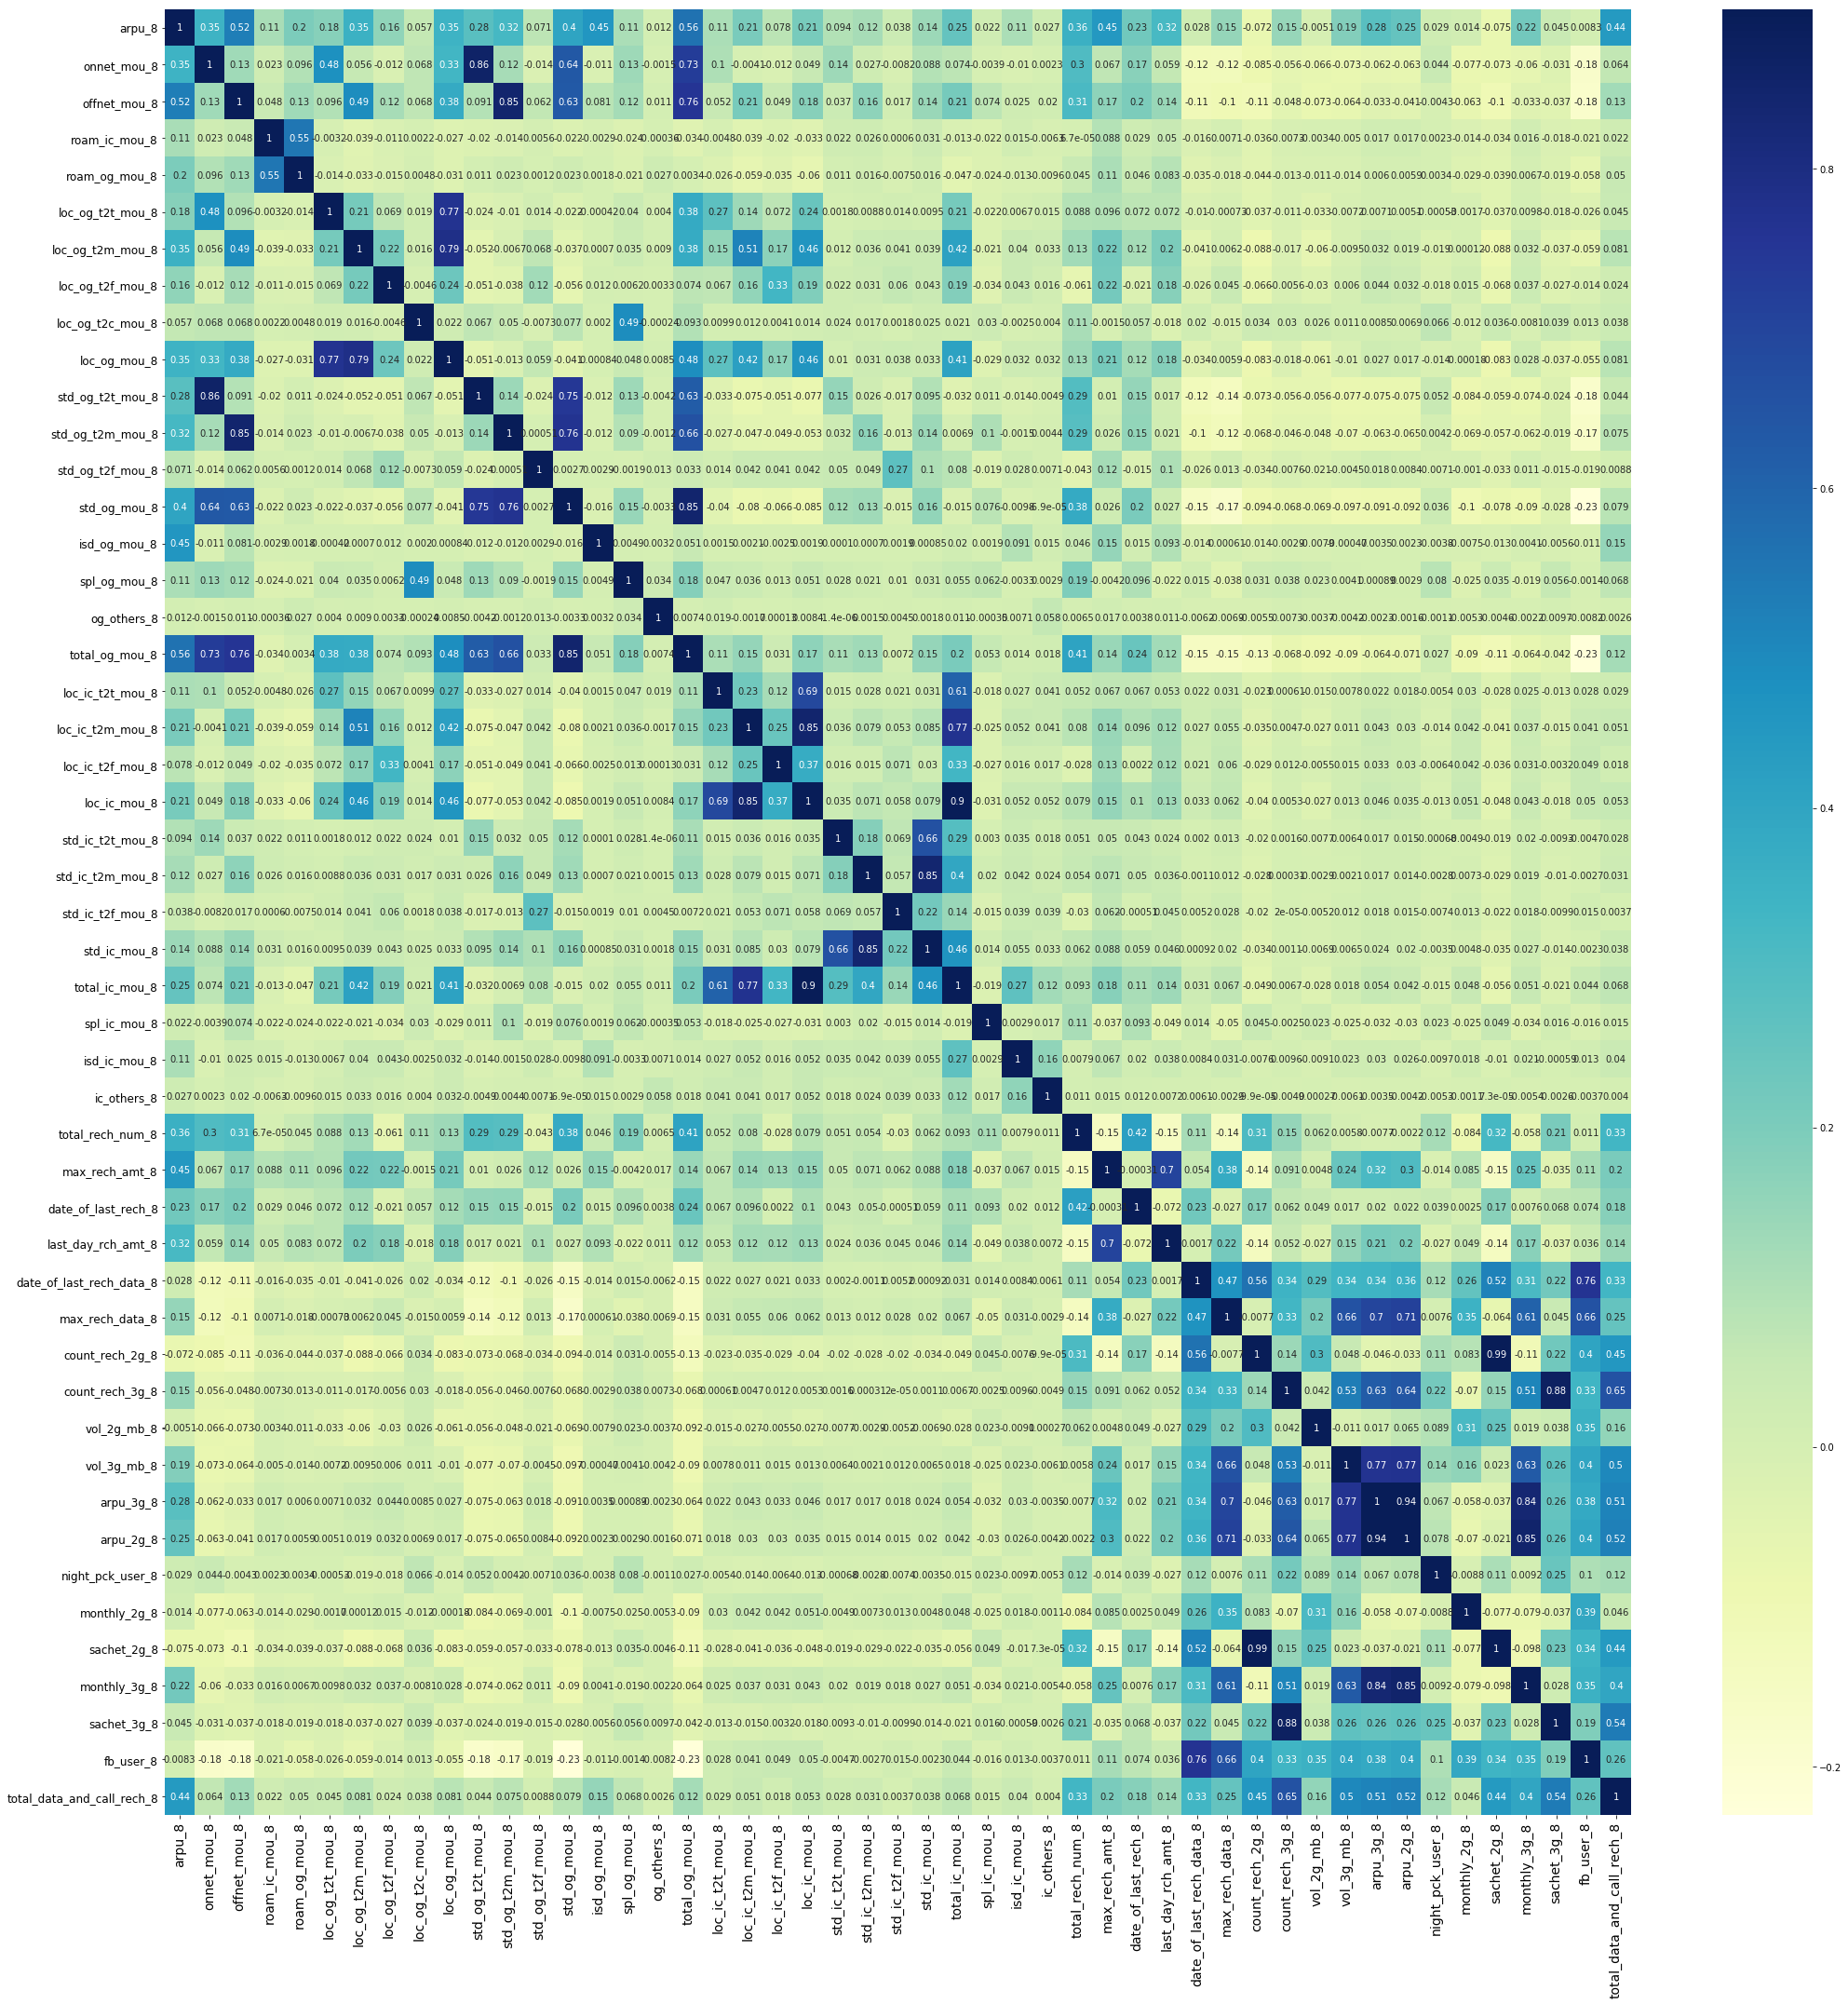

In [30]:
#Correlation map to see how features are correlated with Churn
corrmat = telecom_8.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, cmap="YlGnBu", vmax=0.9,annot = True)
plt.xticks(size = 14)
plt.yticks(size = 12)
plt.tight_layout()
plt.show()

In [31]:
#total_ic_mou_8 and loc_ic_mou_8 are highly correlated i.e correlation of .9, so all incoming voice calls are mostly local calls.
#count_rech_2g_8 and sachet_2g_8 are highly correlated i.e. 0.99, so more 2g sachet buys means more 2g recharge.
#count_rech_3g_8 and sachet_3g_8 are highly correlated i.e. 0.88, so more 3g sachet buys means more 3g recharge.
#arpu_3g_8 and arpu_2g_8 are highly correlated i.e. 0.94.

In [32]:
#Merging the columns for average revenue from data usage and monthly data usage for both the "good times" phase as well as the "action" phase and dropping the original columns


telecom['arpu_2g_3g_6']= telecom['arpu_3g_6']+telecom['arpu_2g_6']
telecom['arpu_2g_3g_7']= telecom['arpu_3g_7']+telecom['arpu_2g_7']
telecom['arpu_2g_3g_8']= telecom['arpu_3g_8']+telecom['arpu_2g_8']

telecom['monthly_2g_3g_6']= telecom['monthly_3g_6']+telecom['monthly_2g_6']
telecom['monthly_2g_3g_7']= telecom['monthly_3g_7']+telecom['monthly_2g_7']
telecom['monthly_2g_3g_8']= telecom['monthly_3g_8']+telecom['monthly_2g_8']

telecom.drop(['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','monthly_3g_8','monthly_2g_8',
            'monthly_3g_6','monthly_2g_6','monthly_3g_7','monthly_2g_7',
            'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8',
            'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
            'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
           ],axis=1, inplace = True)

telecom.shape

(30001, 139)

In [33]:
# Reinspecting the heatmap
cols = [c for c in telecom.columns if c[-2:] == '_8']
telecom_8=telecom[cols]
telecom_8.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,night_pck_user_8,sachet_2g_8,sachet_3g_8,fb_user_8,total_data_and_call_rech_8,arpu_2g_3g_8,monthly_2g_3g_8
0,213.803,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,252.000,5.750,109.610,0.000,0,0,1.000,504.000,424.340,1
7,3171.480,52.290,325.910,31.640,38.060,40.280,162.280,53.230,0.000,255.790,...,0.000,0.000,0.000,0.000,0,0,0.000,3638.000,0.000,0
8,137.362,35.080,136.480,0.000,0.000,12.490,50.540,0.000,7.150,63.040,...,23.000,0.030,11.940,0.000,3,0,1.000,327.000,19.830,0
21,637.760,85.140,983.390,0.000,0.000,23.340,104.810,1.580,0.000,129.740,...,0.000,0.000,0.000,0.000,0,0,0.000,718.000,0.000,0
23,366.966,33.580,205.890,0.000,0.000,33.580,148.560,0.000,17.710,182.140,...,179.000,0.010,1009.920,0.000,0,1,1.000,979.000,347.940,1


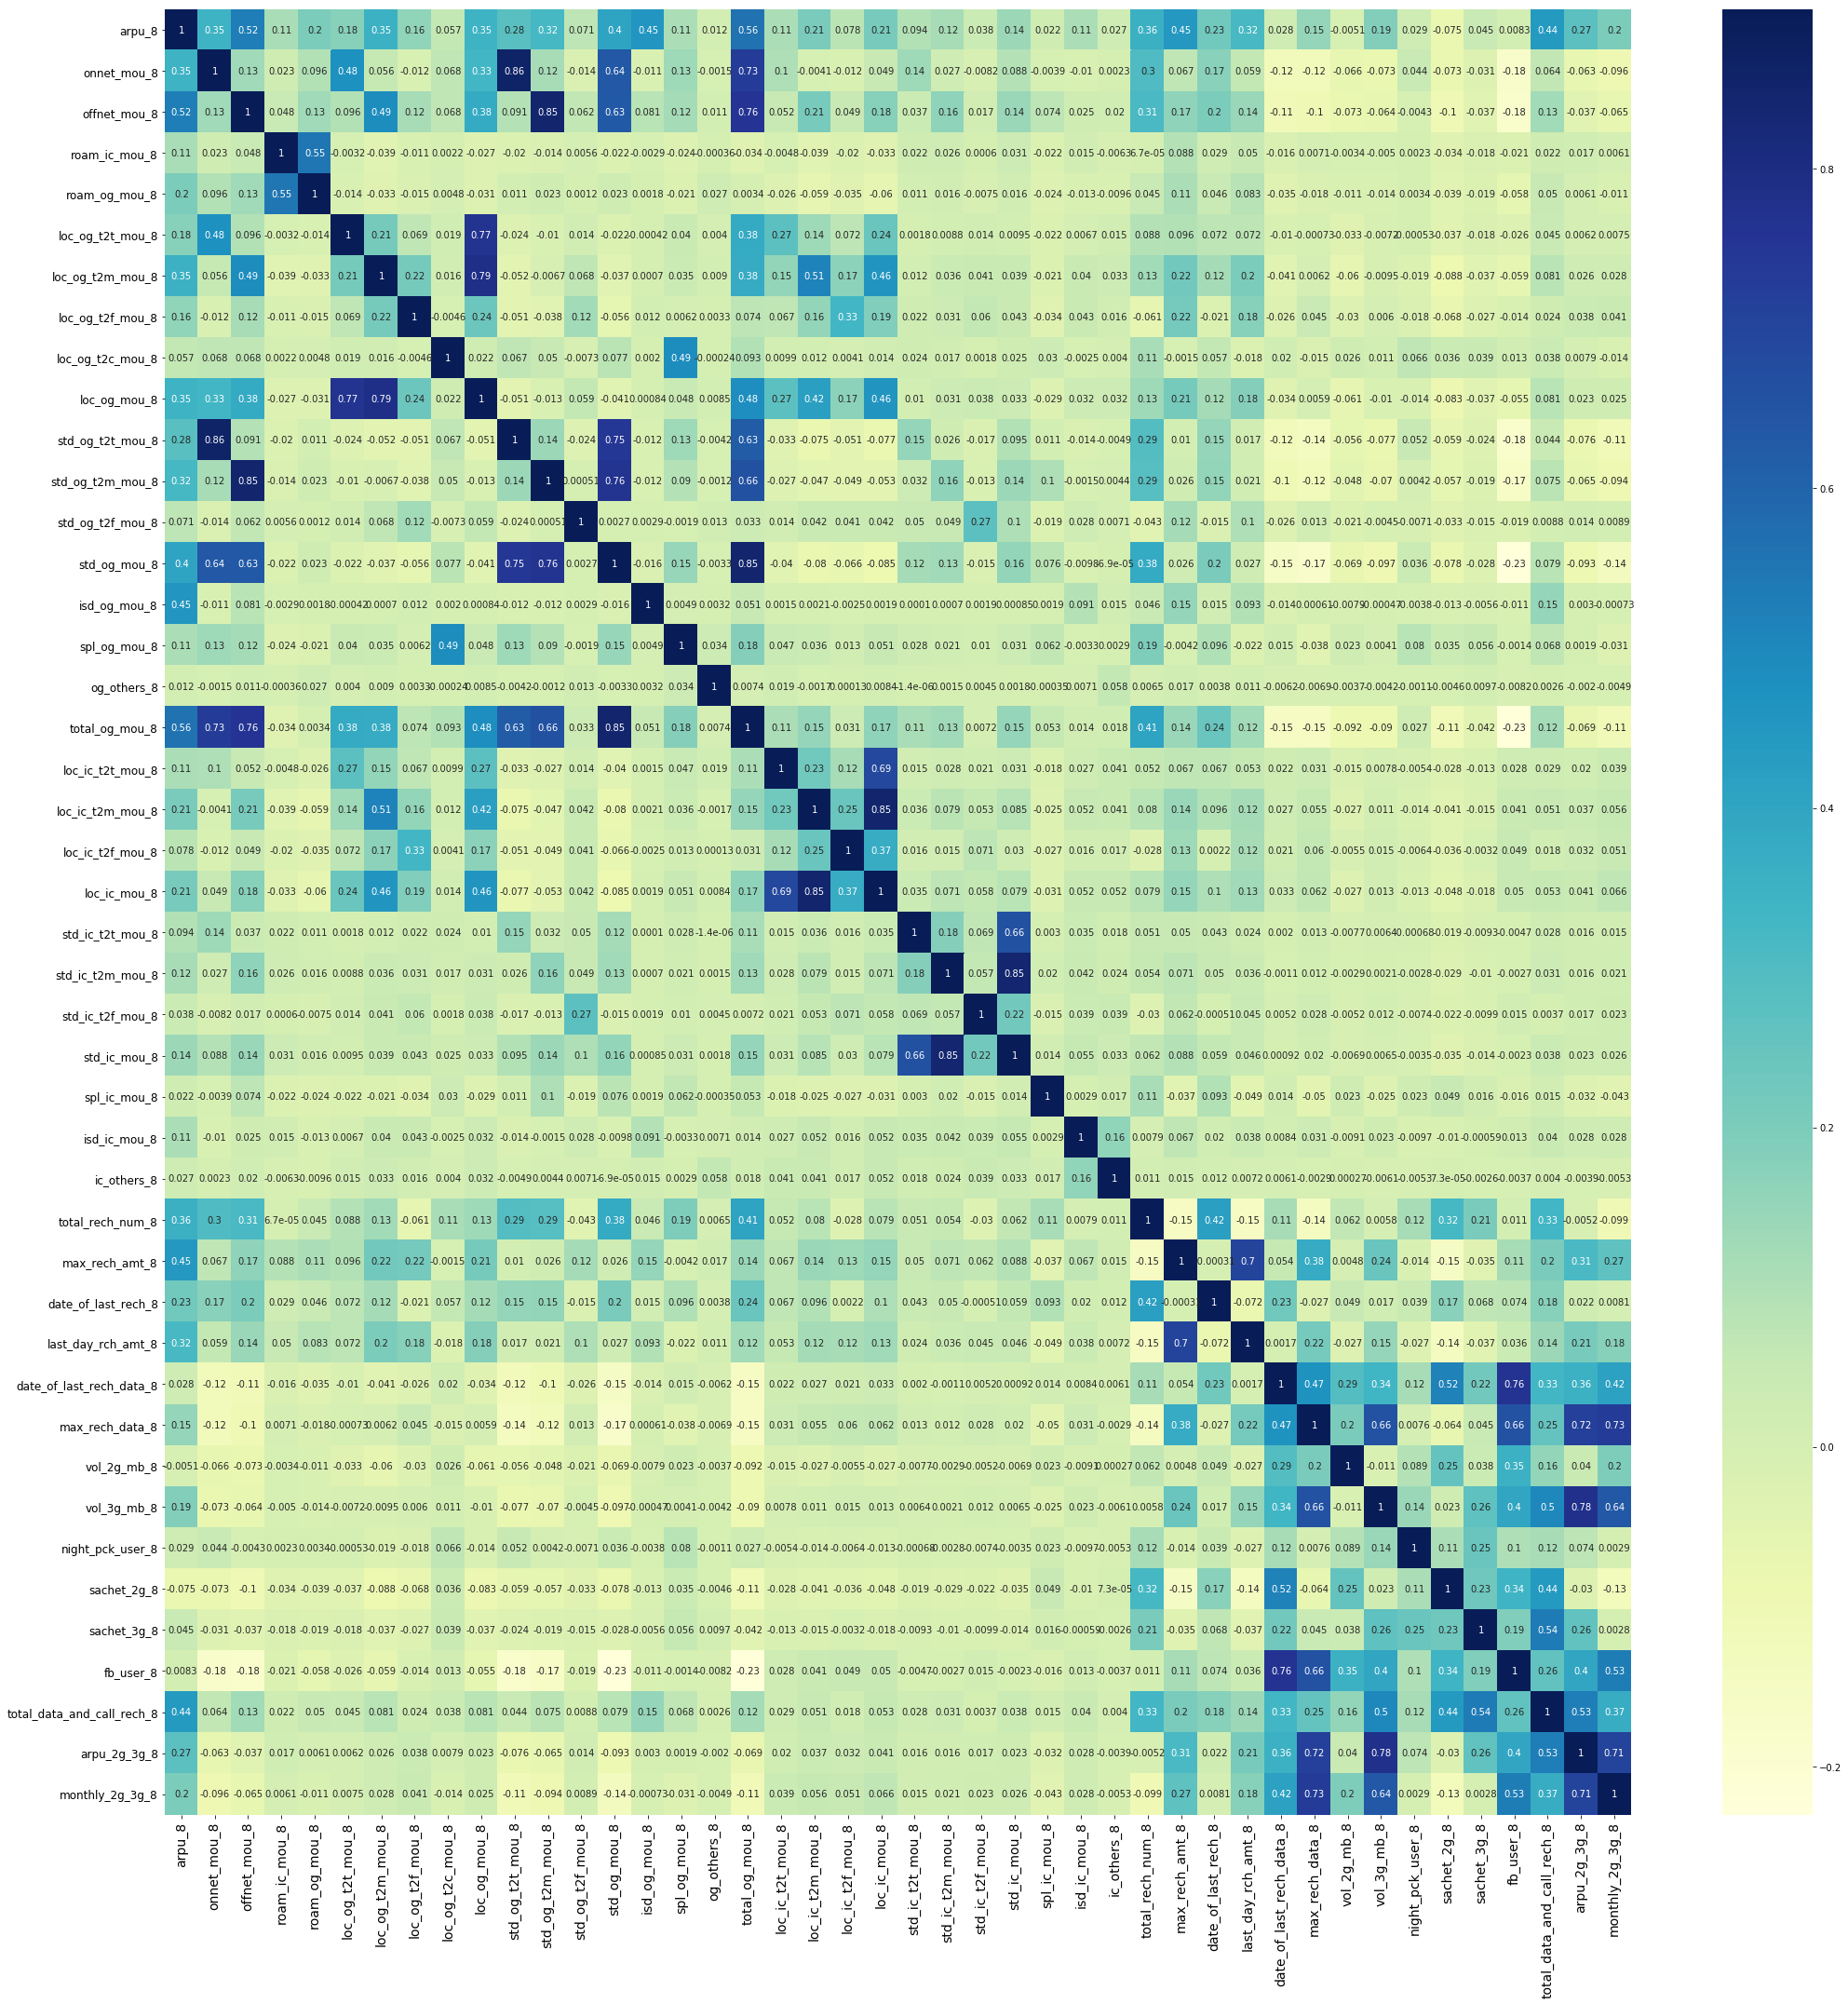

In [34]:

#Correlation map to see how features are correlated with Churn
corrmat = telecom_8.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, cmap="YlGnBu", vmax=0.9,annot = True)
plt.xticks(size = 14)
plt.yticks(size = 12)
plt.tight_layout()
plt.show()

In [35]:

### Checking the Lead Conversion Rate
churned = (sum(telecom['churn'])/len(telecom['churn'].index))*100
churned

8.136395453484884

In [37]:
# Inspecting no of Churn and non-churn customers
telecom.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [38]:
from sklearn.utils import resample

telecom_majority = telecom[telecom['churn']==0]
telecom_minority = telecom[telecom['churn']==1]

telecom_minority_upsampled = resample(telecom_minority,
replace=True,
n_samples=27560, #same number of samples as majority class
random_state=1) #set the seed for random resampling
# Combine resampled results
telecom_upsampled = pd.concat([telecom_majority, telecom_minority_upsampled])

telecom_upsampled['churn'].value_counts()

1    27560
0    27560
Name: churn, dtype: int64

In [39]:
# split into train and test
train, test = train_test_split(telecom_upsampled, test_size = 0.6)

# Putting feature variables to X
# Putting response variable to y
X_train_upsampled = train.drop(['mobile_number','churn'], axis=1)
X_test_upsampled = test.drop(['mobile_number','churn'], axis=1)
y_train_upsampled = train['churn']
y_test_upsampled = test['churn']

print(X_train_upsampled.shape)
print(y_train_upsampled.shape)
print(X_test_upsampled.shape)
print(y_test_upsampled.shape)

(22048, 137)
(22048,)
(33072, 137)
(33072,)


In [40]:

print(y_train_upsampled.value_counts())
print(y_test_upsampled.value_counts())

0    11038
1    11010
Name: churn, dtype: int64
1    16550
0    16522
Name: churn, dtype: int64


In [41]:
# Using sklearn Standard Scaler to normalize the feature variables
scaler = StandardScaler()

X_train_upsampled = scaler.fit_transform(X_train_upsampled)
X_test_upsampled = scaler.transform(X_test_upsampled)

pd.DataFrame(X_test_upsampled).head()

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,1.080,-1.014,-0.855,3.593,-0.518,-0.423,0.255,-0.695,-0.578,-0.206,...,0.195,-0.682,-0.574,-0.332,-0.392,-0.363,-0.314,-0.493,-0.467,-0.402
1,0.065,-0.825,-0.283,-0.487,-0.487,-0.320,-0.449,-0.549,-0.281,-0.206,...,-0.265,-0.526,-0.178,-0.486,0.091,-0.363,-0.314,0.940,-0.467,-0.402
2,-0.662,0.209,0.817,-0.313,0.675,0.936,-0.548,-0.404,0.048,-0.206,...,-0.591,-0.214,0.219,-0.465,-0.392,-0.363,-0.314,-0.493,-0.467,-0.402
3,0.269,-0.162,-0.613,0.045,-0.054,-0.437,-0.705,-0.684,-0.538,-0.206,...,-0.031,-0.354,-0.356,-0.246,0.534,-0.012,-0.196,-0.493,-0.467,-0.402
4,-0.458,-0.225,0.135,-0.263,0.280,0.108,-0.415,-0.413,0.386,-0.206,...,-0.543,-0.300,-0.141,-0.494,-0.392,-0.337,-0.314,-0.493,-0.467,-0.402


In [42]:
X_train_upsampled.shape
# We have 30 variables after creating our dummy variables for our categories

(22048, 137)

In [43]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [44]:
#Doing the PCA on the train data
pca.fit(X_train_upsampled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [45]:
pca.n_components_

137

In [46]:

pca.components_

array([[-6.23030758e-02, -5.66318642e-02, -2.44954452e-02, ...,
         1.51316084e-01,  1.59340719e-01,  1.52493515e-01],
       [ 9.02084074e-02,  1.59976326e-01,  2.08250142e-01, ...,
         5.09143990e-02,  8.11844236e-02,  9.96614082e-02],
       [ 5.29148230e-02,  1.06906913e-01,  9.28496197e-02, ...,
         5.73667532e-02,  7.70366135e-02,  7.21165515e-02],
       ...,
       [-1.67283033e-07,  1.91060911e-07, -1.47432358e-07, ...,
         1.94710311e-08, -3.96816108e-08, -4.15969707e-08],
       [-2.18537932e-07,  7.18994084e-08, -1.47917732e-07, ...,
         9.50143389e-08, -2.41605630e-08, -6.24796882e-08],
       [ 8.07472281e-17, -1.61668258e-16,  1.51162278e-17, ...,
        -7.82070033e-17,  2.56623375e-18, -8.07005315e-18]])

In [47]:
colnames = list(pd.DataFrame(X_train_upsampled).columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.062,0.090,0
1,-0.057,0.160,1
2,-0.024,0.208,2
3,-0.136,0.042,3
4,-0.142,0.077,4


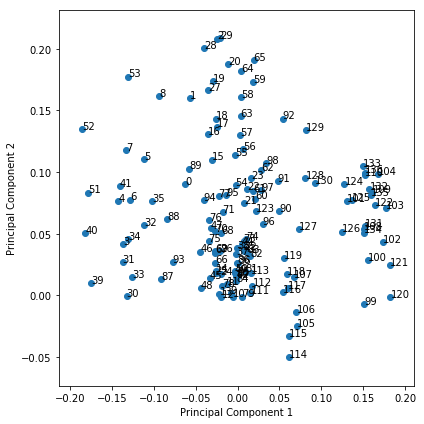

In [48]:
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [49]:
pd.options.display.float_format = '{:.2f}'.format
pca.explained_variance_ratio_

array([9.66647240e-02, 8.27849101e-02, 5.66232871e-02, 4.40453124e-02,
       3.58546613e-02, 3.14537015e-02, 3.08057771e-02, 2.80849028e-02,
       2.50028958e-02, 2.20651395e-02, 2.14774473e-02, 1.99166388e-02,
       1.87757883e-02, 1.78562153e-02, 1.72869653e-02, 1.68899950e-02,
       1.66836329e-02, 1.51700537e-02, 1.48655549e-02, 1.39129481e-02,
       1.29623301e-02, 1.24856510e-02, 1.13428293e-02, 1.07440459e-02,
       1.06450715e-02, 9.98648621e-03, 9.33155677e-03, 9.13992821e-03,
       9.03188810e-03, 8.82815917e-03, 8.32679338e-03, 8.17675119e-03,
       8.04726546e-03, 7.52185999e-03, 7.28893777e-03, 7.12117589e-03,
       7.08741158e-03, 6.98581514e-03, 6.69725609e-03, 6.63484843e-03,
       6.43454624e-03, 6.19250092e-03, 6.05862100e-03, 5.87610170e-03,
       5.60041939e-03, 5.48063108e-03, 5.08501497e-03, 4.97682612e-03,
       4.83990283e-03, 4.79557655e-03, 4.70027275e-03, 4.59384110e-03,
       4.43896516e-03, 4.23571775e-03, 4.12004726e-03, 4.07649054e-03,
      

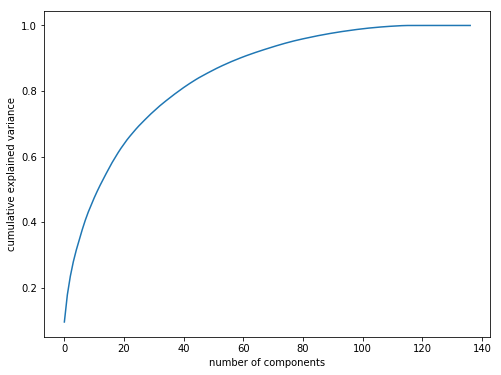

In [50]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [51]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca_again = PCA(0.95)

In [52]:

#Doing the PCA on the train data
pca_again.fit(X_train_upsampled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [53]:
pca_again.n_components_

77

In [54]:
pca_again.components_

array([[-0.06230308, -0.05663186, -0.02449545, ...,  0.15131608,
         0.15934072,  0.15249351],
       [ 0.09020841,  0.15997633,  0.20825014, ...,  0.0509144 ,
         0.08118442,  0.09966141],
       [ 0.05291482,  0.10690691,  0.09284962, ...,  0.05736675,
         0.07703661,  0.07211655],
       ...,
       [ 0.02309164,  0.04911716,  0.0157731 , ..., -0.05950128,
         0.01791489,  0.08749195],
       [-0.04046246, -0.03746383, -0.02616929, ...,  0.03043289,
         0.00850069, -0.03034071],
       [ 0.08896268,  0.00808269,  0.13075446, ..., -0.10130612,
        -0.01256174,  0.0182492 ]])

In [55]:
colnames = list(pd.DataFrame(X_train_upsampled).columns)
pcs_df = pd.DataFrame({'PC1':pca_again.components_[0],'PC2':pca_again.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.06,0.09,0
1,-0.06,0.16,1
2,-0.02,0.21,2
3,-0.14,0.04,3
4,-0.14,0.08,4


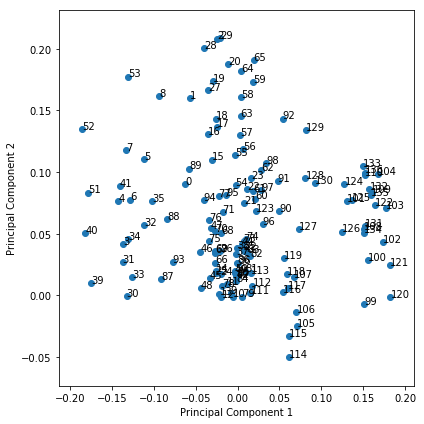

In [56]:

%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [57]:
X_train_upsampled_pca = pca_again.transform(X_train_upsampled)
X_test_upsampled_pca = pca_again.transform(X_test_upsampled)
X_train_upsampled_pca

array([[ 3.77914654e+00,  3.85056555e-01,  6.96759167e-01, ...,
        -1.41869267e-01,  1.66539362e-01,  9.93800166e-01],
       [-4.23599072e+00,  3.90265704e+00, -2.52482526e-02, ...,
        -2.20848634e-01,  7.04828655e-01,  4.75474639e-02],
       [ 1.16159175e+00, -3.86296252e+00, -1.23535779e+00, ...,
         2.29232335e-01, -4.99306866e-02,  3.34049083e-01],
       ...,
       [ 1.64601167e+00,  5.34923725e+00, -4.27837494e+00, ...,
         4.16611589e-01, -1.37944855e-01,  2.01327636e-02],
       [-4.09587567e+00,  4.44979902e+00, -2.50468364e-01, ...,
         1.38564375e-04,  1.35034171e-01,  5.90689337e-02],
       [-1.85328858e+00, -1.64719910e+00, -5.85087770e-01, ...,
        -1.60589553e-01,  3.61372054e-02,  5.43119729e-02]])

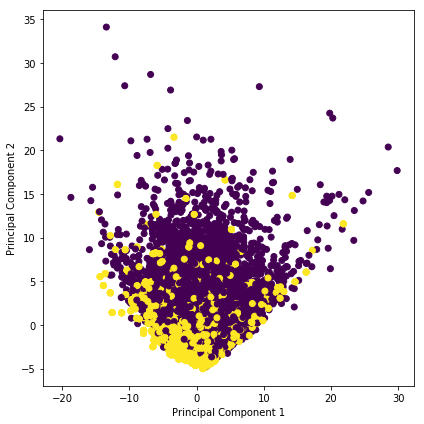

In [58]:
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.scatter(X_train_upsampled_pca[:,0], X_train_upsampled_pca[:,1], c = y_train_upsampled)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [148]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<IPython.core.display.Javascript object>


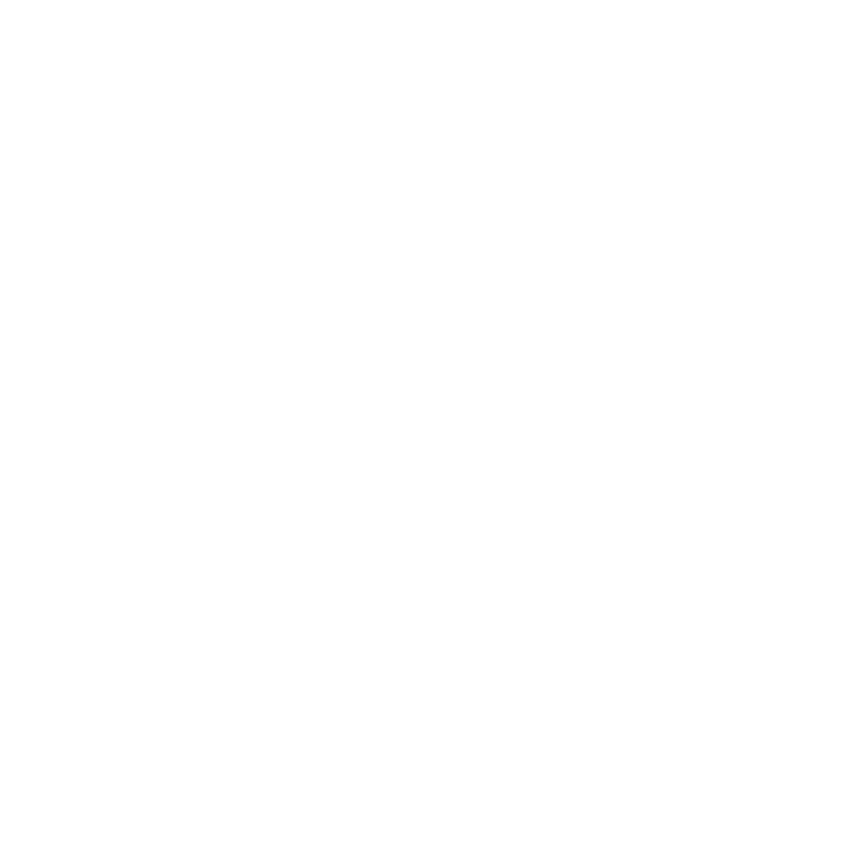

Text(0.5, 0, 'Principal Component 1')

Text(0.5, 0, 'Principal Component 2')

Text(0.5, 0, 'Principal Component 3')

<IPython.core.display.Javascript object>


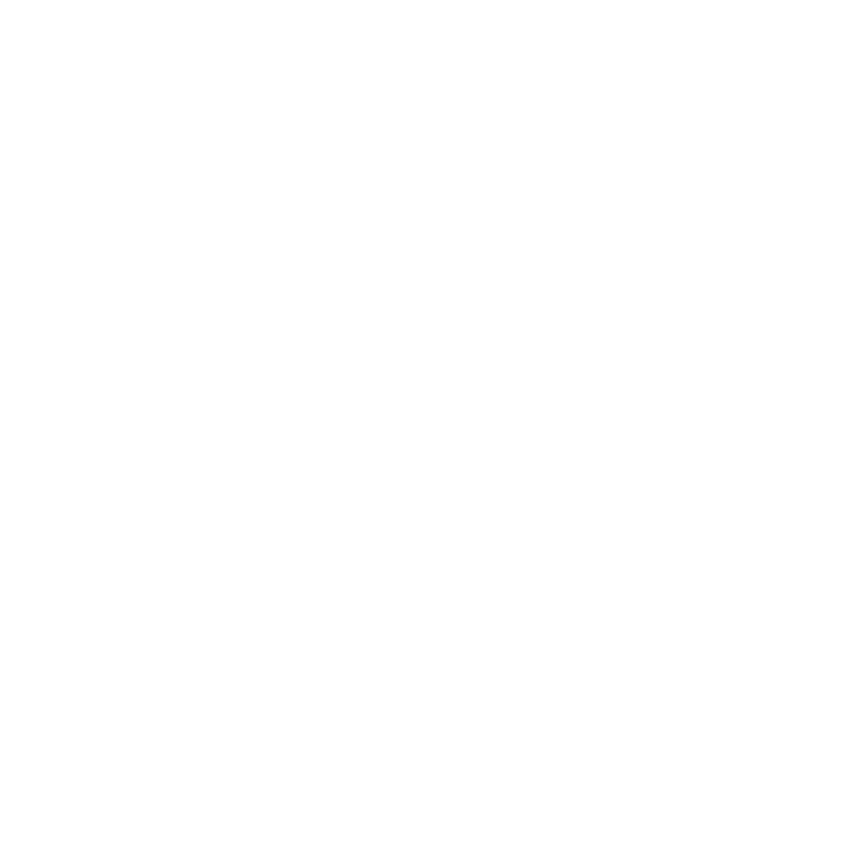

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
#%matplotlib notebook
get_ipython().magic('matplotlib notebook')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter(X_train_upsampled_pca[:,2], X_train_upsampled_pca[:,0], X_train_upsampled_pca[:,1],zdir='z', s=20, marker = 'o', c=y_train_upsampled)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.tight_layout()
plt.show()

accuracy: 0.8291606192549589
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     16522
           1       0.82      0.84      0.83     16550

   micro avg       0.83      0.83      0.83     33072
   macro avg       0.83      0.83      0.83     33072
weighted avg       0.83      0.83      0.83     33072



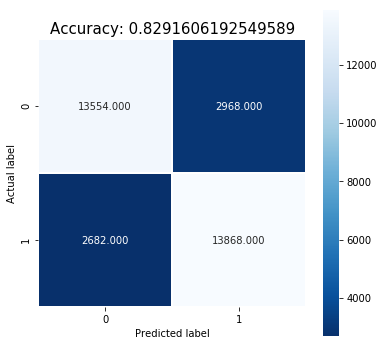

In [152]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logisticRegr = LogisticRegression()
logisticRegr.fit(X=X_train_upsampled_pca, y=y_train_upsampled)

test_y_pred_balanced = logisticRegr.predict(X_test_upsampled_pca)
accuracy =  metrics.accuracy_score(y_test_upsampled, test_y_pred_balanced)
print("accuracy:", accuracy)
print(classification_report(y_test_upsampled, test_y_pred_balanced))

# Calculating confusion matrix
cmlr = metrics.confusion_matrix(y_true=y_test_upsampled, y_pred=test_y_pred_balanced)

# Plotting confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

plt.figure(figsize=(6,6))
sns.heatmap(cmlr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [61]:

TP = cmlr[1,1] # true positive 
TN = cmlr[0,0] # true negatives
FP = cmlr[0,1] # false positives
FN = cmlr[1,0] # false negatives

#### Showcasing the different metrics beyond accuracy on the test dataset

##### Sensitivity (TP / TP + FN)
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:", TP / float(TP+FN))

##### Specificity(TN / TN + FP)
# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

##### False Postive Rate(FP / TN + FP)
# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate:", FP/ float(TN+FP))

##### Positive Predictive Value(TP / TP + FP)
# Positive predictive value 
print("Positive Predictive Value:", TP / float(TP+FP))

##### Negative Predictive Value(TN / TN + FN)
# Negative predictive value
print("Negative Predictive Value:", TN / float(TN+ FN))

##### Precision(TP / TP + FP)
Precision = cmlr[1,1]/(cmlr[0,1]+cmlr[1,1])
print("Precision:", Precision)

##### Recall(TP / TP + FN)
Recall = cmlr[1,1]/(cmlr[1,0]+cmlr[1,1])
print("Recall:", Recall)

##### F1 = 2×(Precision*Recall)/(Precision+Recall)
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1
print("F1 Score:", F1)

Sensitivity: 0.8379456193353474
Specificity: 0.8203607311463503
False Postive Rate: 0.17963926885364967
Positive Predictive Value: 0.8237110952720361
Negative Predictive Value: 0.8348115299334812
Precision: 0.8237110952720361
Recall: 0.8379456193353474
F1 Score: 0.8307673875277063


In [157]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    %matplotlib inline
    #import matplotlib.pyplot as plt
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [158]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_upsampled, test_y_pred_balanced, drop_intermediate = False )

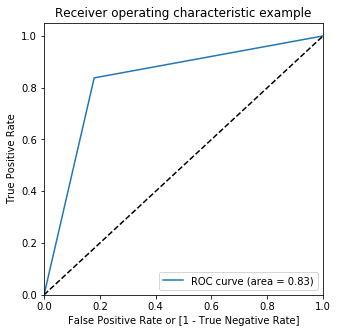

(array([0.        , 0.17963927, 1.        ]),
 array([0.        , 0.83794562, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [159]:
draw_roc(y_test_upsampled, test_y_pred_balanced)

In [65]:

def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [161]:
#So with Logistic regression, we get an accuracy of 0.83. 
#Lets see if we can improve on the score with non-linear models like Random forest or SVM

0.829153175240849

In [161]:
auc = auc_val(fpr,tpr)
auc

0.829153175240849

In [193]:
#Model Building Random Forest

In [194]:
#Let's fist build a non-linear model first with default hyperparameters and tune the hyper parameters
#model with default hyperparameters below

In [67]:

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [68]:
# fit
rfc.fit(X_train_upsampled_pca,y_train_upsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:

# Making predictions
predictions = rfc.predict(X_test_upsampled_pca)

In [70]:
# Let's check the report of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test_upsampled,predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     16522
           1       0.96      0.99      0.98     16550

   micro avg       0.97      0.97      0.97     33072
   macro avg       0.98      0.97      0.97     33072
weighted avg       0.98      0.97      0.97     33072



In [162]:

# Printing confusion matrix
print(confusion_matrix(y_test_upsampled,predictions))

[[15286  1236]
 [  578 15972]]


In [163]:
print(accuracy_score(y_test_upsampled,predictions))

0.9451499758103532


In [164]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(5, 50, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_upsampled_pca, y_train_upsampled)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 50, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [165]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.875,0.565,0.022,0.007,5,{'max_depth': 5},0.826,0.814,0.827,0.824,...,0.822,0.005,5,0.823,0.830,0.833,0.832,0.836,0.831,0.004
1,2.912,0.474,0.029,0.001,15,{'max_depth': 15},0.954,0.942,0.949,0.945,...,0.948,0.004,4,0.987,0.987,0.988,0.987,0.987,0.987,0.000
2,3.088,0.220,0.038,0.006,25,{'max_depth': 25},0.966,0.958,0.959,0.965,...,0.961,0.003,2,0.997,0.999,0.998,0.998,0.998,0.998,0.000
3,3.214,0.499,0.032,0.005,35,{'max_depth': 35},0.963,0.958,0.958,0.965,...,0.961,0.003,3,0.998,0.999,0.999,0.999,0.999,0.999,0.000
4,3.360,0.711,0.034,0.003,45,{'max_depth': 45},0.970,0.958,0.960,0.964,...,0.964,0.005,1,0.999,0.999,0.999,0.999,0.999,0.999,0.000


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

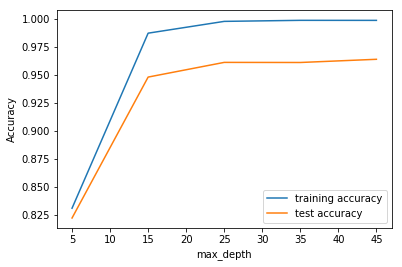

In [166]:

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [167]:

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rf.best_score_,'using',rf.best_params_)

We can get accuracy of 0.9640330188679245 using {'max_depth': 45}


In [169]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [2,4, 8, 14, 20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=25)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_upsampled_pca, y_train_upsampled)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [2, 4, 8, 14, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [170]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.033,0.192,0.038,0.007,2,{'max_features': 2},0.967,0.960,0.963,0.970,...,0.966,0.004,1,0.998,0.999,0.999,0.999,0.999,0.999,0.000
1,1.577,0.129,0.034,0.004,4,{'max_features': 4},0.968,0.954,0.963,0.968,...,0.963,0.005,2,0.999,0.998,0.999,0.998,0.998,0.998,0.000
2,2.899,0.118,0.034,0.007,8,{'max_features': 8},0.966,0.954,0.960,0.967,...,0.962,0.005,3,0.999,0.998,0.998,0.999,0.998,0.998,0.000
3,5.224,0.372,0.032,0.003,14,{'max_features': 14},0.969,0.956,0.959,0.961,...,0.962,0.004,4,0.998,0.998,0.998,0.998,0.998,0.998,0.000
4,7.682,0.811,0.032,0.004,20,{'max_features': 20},0.961,0.955,0.958,0.959,...,0.959,0.002,5,0.997,0.998,0.998,0.998,0.997,0.998,0.000


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_features')

Text(0, 0.5, 'Accuracy')

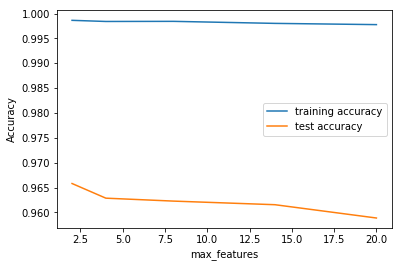

In [172]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [173]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rf.best_score_,'using',rf.best_params_)

We can get accuracy of 0.9658018867924528 using {'max_features': 2}


In [175]:
#Tuning min_samples_leaf
#The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

#Let's now check the optimum value for min samples leaf in our case

In [179]:


# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 100, 20)}

# instantiate the model
rf = RandomForestClassifier(max_depth=25)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_upsampled_pca, y_train_upsampled)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 100, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [180]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.023,0.240,0.036,0.004,5,{'min_samples_leaf': 5},0.940,0.931,0.933,0.938,...,0.936,0.003,1,0.981,0.984,0.983,0.982,0.983,0.983,0.001
1,3.164,0.445,0.037,0.014,25,{'min_samples_leaf': 25},0.889,0.880,0.886,0.886,...,0.883,0.006,2,0.912,0.915,0.916,0.916,0.916,0.915,0.001
2,2.457,0.359,0.028,0.004,45,{'min_samples_leaf': 45},0.869,0.851,0.858,0.862,...,0.858,0.007,3,0.881,0.884,0.883,0.887,0.885,0.884,0.002
3,2.139,0.257,0.026,0.009,65,{'min_samples_leaf': 65},0.855,0.841,0.851,0.851,...,0.848,0.005,4,0.867,0.866,0.865,0.868,0.865,0.866,0.001
4,2.473,0.358,0.026,0.004,85,{'min_samples_leaf': 85},0.846,0.824,0.844,0.837,...,0.838,0.007,5,0.852,0.855,0.853,0.853,0.859,0.854,0.003


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_leaf')

Text(0, 0.5, 'Accuracy')

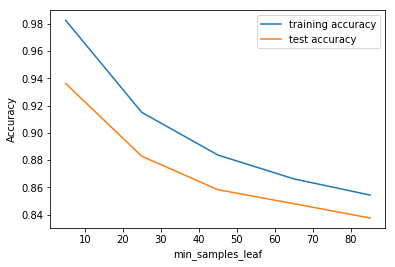

In [181]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [182]:

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rf.best_score_,'using',rf.best_params_)

We can get accuracy of 0.9362300435413643 using {'min_samples_leaf': 5}


In [183]:
##### GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(10, 300, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=25)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_upsampled_pca, y_train_upsampled)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(10, 300, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [185]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.198,0.544,0.030,0.001,10,{'min_samples_split': 10},0.957,0.945,0.952,0.949,...,0.952,0.004,1,0.994,0.993,0.993,0.994,0.992,0.993,0.001
1,2.805,0.275,0.030,0.002,60,{'min_samples_split': 60},0.909,0.900,0.907,0.905,...,0.905,0.003,2,0.942,0.945,0.949,0.946,0.944,0.945,0.002
2,3.019,0.443,0.033,0.008,110,{'min_samples_split': 110},0.884,0.876,0.875,0.878,...,0.878,0.003,3,0.909,0.914,0.910,0.913,0.912,0.912,0.002
3,2.632,0.209,0.026,0.003,160,{'min_samples_split': 160},0.878,0.856,0.856,0.863,...,0.863,0.008,4,0.893,0.889,0.885,0.885,0.890,0.888,0.003
4,2.986,0.610,0.033,0.008,210,{'min_samples_split': 210},0.866,0.846,0.855,0.856,...,0.854,0.007,5,0.877,0.874,0.877,0.875,0.878,0.876,0.002


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_split')

Text(0, 0.5, 'Accuracy')

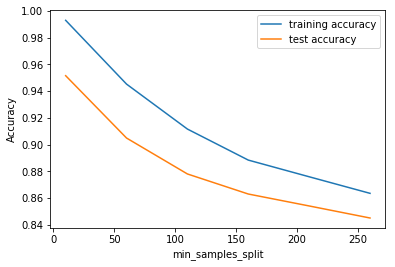

In [186]:

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [187]:
#We can see that the model starts to overfit once we increase the value of minimum split as well

In [188]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rf.best_score_,'using',rf.best_params_)

We can get accuracy of 0.951605587808418 using {'min_samples_split': 10}


In [189]:
#Grid Search to find hyperparameters
param_grid = {
    'max_depth': [15, 25],
    'min_samples_leaf': range(10, 100, 50),
    'min_samples_split': range(10, 100, 50),
    'n_estimators': [100,200, 300], 
    'max_features': [4, 8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [190]:
# Fit the grid search to the data
grid_search.fit(X_train_upsampled_pca, y_train_upsampled)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 16.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [15, 25], 'min_samples_leaf': range(10, 100, 50), 'min_samples_split': range(10, 100, 50), 'n_estimators': [100, 200, 300], 'max_features': [4, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [195]:

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9253900580551524 using {'max_depth': 25, 'max_features': 4, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [196]:
#fit the final model with best parameters obtained from grid search

In [197]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=25,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=4,
                             n_estimators=100)

In [198]:

# fit
rfc.fit(X_train_upsampled_pca,y_train_upsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [199]:
# predict
predictions = rfc.predict(X_test_upsampled_pca)

accuracy: 0.9474177552007741
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     16522
           1       0.93      0.97      0.95     16550

   micro avg       0.95      0.95      0.95     33072
   macro avg       0.95      0.95      0.95     33072
weighted avg       0.95      0.95      0.95     33072



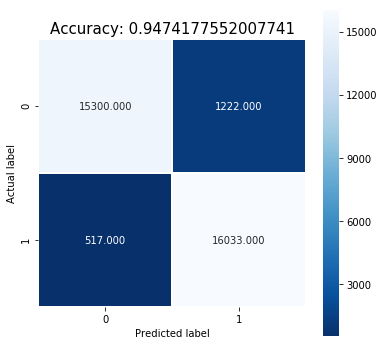

In [200]:

accuracy =  metrics.accuracy_score(y_test_upsampled, predictions)
print("accuracy:", accuracy)
print(classification_report(y_test_upsampled, predictions))

# Calculating confusion matrix
cmrf = metrics.confusion_matrix(y_true=y_test_upsampled, y_pred=predictions)

# Plotting confusion matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

plt.figure(figsize=(6,6))
sns.heatmap(cmrf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [201]:
TP = cmrf[1,1] # true positive 
TN = cmrf[0,0] # true negatives
FP = cmrf[0,1] # false positives
FN = cmrf[1,0] # false negatives

#### Showcasing the different metrics beyond accuracy on the test dataset

##### Sensitivity (TP / TP + FN)
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:", TP / float(TP+FN))

##### Specificity(TN / TN + FP)
# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

##### False Postive Rate(FP / TN + FP)
# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate:", FP/ float(TN+FP))

##### Positive Predictive Value(TP / TP + FP)
# Positive predictive value 
print("Positive Predictive Value:", TP / float(TP+FP))

##### Negative Predictive Value(TN / TN + FN)
# Negative predictive value
print("Negative Predictive Value:", TN / float(TN+ FN))

##### Precision(TP / TP + FP)
Precision = cmrf[1,1]/(cmrf[0,1]+cmrf[1,1])
print("Precision:", Precision)

##### Recall(TP / TP + FN)
Recall = cmrf[1,1]/(cmrf[1,0]+cmrf[1,1])
print("Recall:", Recall)

##### F1 = 2×(Precision*Recall)/(Precision+Recall)
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("F1 Score:", F1)


Sensitivity: 0.9687613293051359
Specificity: 0.926038009926159
False Postive Rate: 0.07396199007384094
Positive Predictive Value: 0.9291799478412055
Negative Predictive Value: 0.9673136498703926
Precision: 0.9291799478412055
Recall: 0.9687613293051359
F1 Score: 0.9485579056352611


In [202]:
#Plot ROC curve for test dataset
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [203]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_upsampled, predictions, drop_intermediate = False )

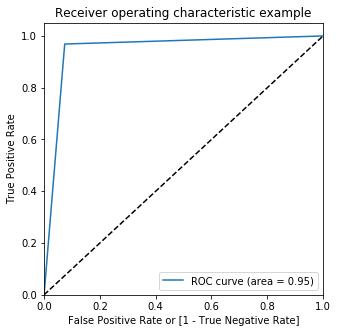

(array([0.        , 0.07396199, 1.        ]),
 array([0.        , 0.96876133, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [204]:
draw_roc(y_test_upsampled, predictions)

In [205]:
#calculate area under the curve GINI 
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [206]:

auc = auc_val(fpr,tpr)
auc

0.9473996696156475

In [ ]:
#Random forest with chosen Hyper parameters provide an accuracy of 95% Lets try out SVM

In [207]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train_upsampled_pca, y_train_upsampled)

# predict
y_test_pred = model_linear.predict(X_test_upsampled_pca)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [208]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test_upsampled, y_pred=y_test_pred), "\n")
print(classification_report(y_test_upsampled, predictions))

accuracy: 0.8338473633284954 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     16522
           1       0.93      0.97      0.95     16550

   micro avg       0.95      0.95      0.95     33072
   macro avg       0.95      0.95      0.95     33072
weighted avg       0.95      0.95      0.95     33072



In [ ]:
#linear models give an accuracy of 84% lets look at a sufficiently non linear model with randomly chosen hypothesis

In [209]:

# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train_upsampled_pca, y_train_upsampled)

# predict
y_test_pred = non_linear_model.predict(X_test_upsampled_pca)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [210]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test_upsampled, y_pred=y_test_pred), "\n")
print(classification_report(y_test_upsampled, predictions))

accuracy: 0.9122520561199806 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     16522
           1       0.93      0.97      0.95     16550

   micro avg       0.95      0.95      0.95     33072
   macro avg       0.95      0.95      0.95     33072
weighted avg       0.95      0.95      0.95     33072



In [211]:
#Non linear models give an accuracy of 91%  so we will choose hyperparamter corresponding to non linear models

In [ ]:
#Grid Search - Hyperparameter Tuning
#Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel.
#We'll use 4-fold cross validation.

In [107]:

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs = -1)      

# fit the mode`l
model_cv.fit(X_train_upsampled_pca, y_train_upsampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 29.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [212]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,44.745,0.304,6.260,0.178,1,0.010,"{'C': 1, 'gamma': 0.01}",0.892,0.899,0.901,...,0.898,0.003,5,0.915,0.914,0.915,0.915,0.914,0.915,0.000
1,43.066,0.445,6.547,0.670,1,0.001,"{'C': 1, 'gamma': 0.001}",0.847,0.846,0.839,...,0.843,0.003,10,0.849,0.847,0.849,0.849,0.848,0.848,0.001
2,52.108,1.456,7.641,0.067,1,0.000,"{'C': 1, 'gamma': 0.0001}",0.828,0.831,0.827,...,0.825,0.005,12,0.827,0.825,0.825,0.827,0.828,0.826,0.001
3,83.819,1.971,5.320,0.143,10,0.010,"{'C': 10, 'gamma': 0.01}",0.922,0.929,0.931,...,0.928,0.004,3,0.962,0.959,0.959,0.959,0.959,0.960,0.001
4,39.827,0.353,5.430,0.043,10,0.001,"{'C': 10, 'gamma': 0.001}",0.866,0.868,0.860,...,0.865,0.003,7,0.879,0.876,0.876,0.876,0.877,0.877,0.001
5,42.219,0.573,6.377,0.170,10,0.000,"{'C': 10, 'gamma': 0.0001}",0.838,0.840,0.833,...,0.837,0.003,11,0.839,0.838,0.839,0.839,0.838,0.839,0.000
6,141.501,13.355,5.377,0.144,100,0.010,"{'C': 100, 'gamma': 0.01}",0.936,0.941,0.939,...,0.941,0.004,1,0.991,0.990,0.990,0.990,0.991,0.990,0.000
7,65.406,8.108,7.142,2.907,100,0.001,"{'C': 100, 'gamma': 0.001}",0.888,0.898,0.895,...,0.893,0.004,6,0.915,0.913,0.915,0.916,0.912,0.914,0.001
8,47.964,3.510,6.673,1.095,100,0.000,"{'C': 100, 'gamma': 0.0001}",0.848,0.851,0.843,...,0.847,0.003,9,0.851,0.852,0.852,0.853,0.852,0.852,0.000
9,173.767,8.500,5.945,0.529,1000,0.010,"{'C': 1000, 'gamma': 0.01}",0.932,0.941,0.936,...,0.938,0.004,2,0.999,0.999,0.999,0.999,0.999,0.999,0.000


<Figure size 1152x432 with 0 Axes>

Text(0.5, 0, 'C')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Gamma=0.01')

(0.6, 1.1)

Text(0.5, 0, 'C')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Gamma=0.001')

(0.6, 1.1)

Text(0.5, 0, 'C')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Gamma=0.0001')

(0.6, 1.1)

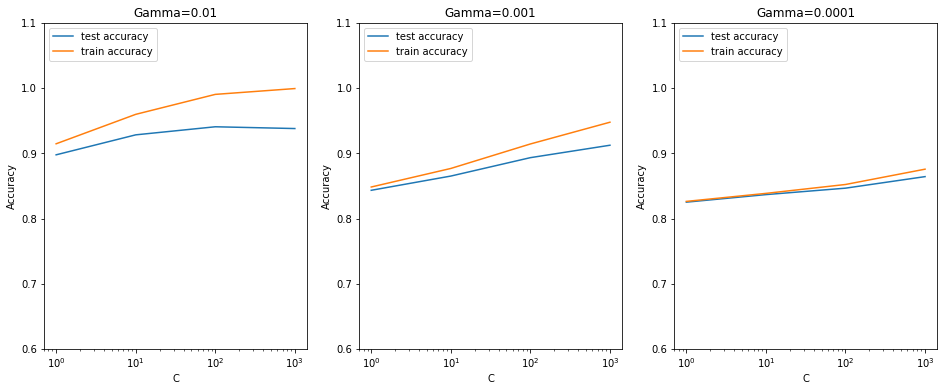

In [213]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [214]:
#from the Above plots we see that 
#Non linear models perform better than linear ones (Very low to Low Gamma)
#At C=100 we get better perfomance

#So both problem and data are non  linear so we need complex model which will perform better than simple ones


In [215]:
#lets Now Choose better hyperparameters

In [216]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9406748911465893 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


accuracy: 0.9498669569424286
classification_report:               precision    recall  f1-score   support

           0       0.99      0.91      0.95     16522
           1       0.91      0.99      0.95     16550

   micro avg       0.95      0.95      0.95     33072
   macro avg       0.95      0.95      0.95     33072
weighted avg       0.95      0.95      0.95     33072



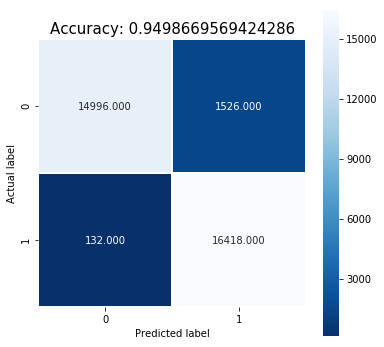

In [217]:
# model with optimal hyperparameters

# model
final_model = SVC(C=100, gamma=0.01, kernel="rbf")

final_model.fit(X_train_upsampled_pca, y_train_upsampled)
y_test_pred = final_model.predict(X_test_upsampled_pca)

# printing accuracy
accuracy =  metrics.accuracy_score(y_test_upsampled, y_test_pred)
print("accuracy:", accuracy)

# Printing classification report
print("classification_report:", classification_report(y_test_upsampled, y_test_pred))

# Calculating confusion matrix
cmsvm = metrics.confusion_matrix(y_true=y_test_upsampled, y_pred=y_test_pred)

# Plotting confusion matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

plt.figure(figsize=(6,6))
sns.heatmap(cmsvm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [218]:
TP = cmsvm[1,1] # true positive 
TN = cmsvm[0,0] # true negatives
FP = cmsvm[0,1] # false positives
FN = cmsvm[1,0] # false negatives

#### Showcasing the different metrics beyond accuracy on the test dataset

##### Sensitivity (TP / TP + FN)
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:", TP / float(TP+FN))

##### Specificity(TN / TN + FP)
# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

##### False Postive Rate(FP / TN + FP)
# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate:", FP/ float(TN+FP))

##### Positive Predictive Value(TP / TP + FP)
# Positive predictive value 
print("Positive Predictive Value:", TP / float(TP+FP))

##### Negative Predictive Value(TN / TN + FN)
# Negative predictive value
print("Negative Predictive Value:", TN / float(TN+ FN))

##### Precision(TP / TP + FP)
Precision = cmsvm[1,1]/(cmsvm[0,1]+cmsvm[1,1])
print("Precision:", Precision)

##### Recall(TP / TP + FN)
Recall = cmsvm[1,1]/(cmsvm[1,0]+cmsvm[1,1])
print("Recall:", Recall)

##### F1 = 2×(Precision*Recall)/(Precision+Recall)
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1
print("F1 Score:", F1)

Sensitivity: 0.99202416918429
Specificity: 0.9076383004478876
False Postive Rate: 0.09236169955211233
Positive Predictive Value: 0.9149576460098083
Negative Predictive Value: 0.991274457958752
Precision: 0.9149576460098083
Recall: 0.99202416918429


0.9519336696237026

F1 Score: 0.9519336696237026


In [219]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [220]:

fpr, tpr, thresholds = metrics.roc_curve( y_test_upsampled, y_test_pred, drop_intermediate = False )

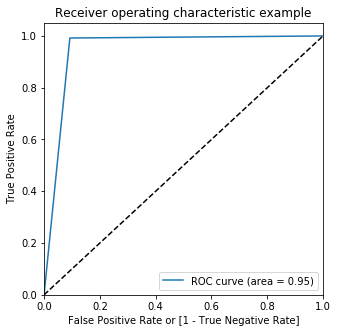

(array([0.       , 0.0923617, 1.       ]),
 array([0.        , 0.99202417, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [221]:
draw_roc(y_test_upsampled, y_test_pred)

In [222]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [223]:
auc = auc_val(fpr,tpr)
auc


0.9498312348160888

In [225]:
#with a Non linear SVM model we get an accuracy of 0.95

In [226]:
#Accuracy of Models 
#Logistic regression -.83 Random forest -0.93  SVM 0.95
#Total Number of Churns Correctly predicted /Total number of Actual churns->sensitivity->TPR or Recall
#recall of models
#Logistic regression:0.84 Random forest -0.96 SVM-0.99

#SO SVM model will be the best implementation for this problem statement


In [227]:
#since earlier models were built after applying PCA we cannot determine features of imporatnce from them so we will go with decision tree

In [224]:
#train, test = train_test_split(telecom_upsampled, test_size = 0.6)
print(train.shape)
print(test.shape)

(22048, 139)
(33072, 139)


In [228]:
# Putting feature variables to X
# Putting response variable to y
X_train_dt = train.drop(['mobile_number','churn'], axis=1)
X_test_dt = test.drop(['mobile_number','churn'], axis=1)
y_train_dt = train['churn']
y_test_dt = test['churn']

print(X_train_dt.shape)
print(y_train_dt.shape)
print(X_test_dt.shape)
print(y_test_dt.shape)

(22048, 137)
(22048,)
(33072, 137)
(33072,)


In [229]:

from sklearn.preprocessing import StandardScaler

In [230]:
# Using sklearn Standard Scaler to normalize the feature variables
scaler = StandardScaler()

X_train_dt = scaler.fit_transform(X_train_dt)
X_test_dt = scaler.transform(X_test_dt)

pd.DataFrame(X_train_dt).head()


,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.055,-0.639,0.063,-0.498,-0.446,-0.376,-0.473,-0.528,-0.504,-0.053,...,0.404,-0.532,0.301,-0.120,1.782,-0.363,1.871,0.940,-0.467,1.321
1,0.692,0.604,0.457,0.059,-0.198,0.143,1.619,2.291,1.559,1.619,...,0.088,-0.060,0.116,0.010,-0.392,-0.363,-0.313,-0.493,-0.467,-0.402
2,2.320,-1.104,-0.878,-0.355,-0.557,-0.443,-0.579,-0.700,-0.579,0.638,...,0.443,-0.682,-0.574,-0.195,2.512,-0.363,-0.314,-0.493,-0.467,-0.402
3,0.025,-0.494,0.111,0.986,0.187,0.159,-0.046,-0.160,0.366,-0.206,...,-0.249,-0.419,-0.138,-0.408,-0.392,-0.363,-0.314,-0.493,-0.467,-0.402
4,-1.065,-0.095,0.504,-0.542,-0.525,-0.342,-0.699,-0.110,-0.013,-0.206,...,-0.810,-0.100,1.454,-0.513,-0.392,-0.363,0.076,-0.493,1.004,1.321


In [231]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(criterion = "gini", max_depth=5)
dt_default.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [232]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test_dt)

# Printing classification report
print(classification_report(y_test_dt, y_pred_default))


              precision    recall  f1-score   support

           0       0.87      0.85      0.86     16522
           1       0.85      0.87      0.86     16550

   micro avg       0.86      0.86      0.86     33072
   macro avg       0.86      0.86      0.86     33072
weighted avg       0.86      0.86      0.86     33072



In [233]:

# Printing confusion matrix and accuracy
print(confusion_matrix(y_test_dt,y_pred_default))
print(accuracy_score(y_test_dt,y_pred_default))

[[14012  2510]
 [ 2171 14379]]
0.8584603289791969


In [234]:

# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features into a variable
features = list(train.drop(['mobile_number','churn'], axis=1).columns[:])
features

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

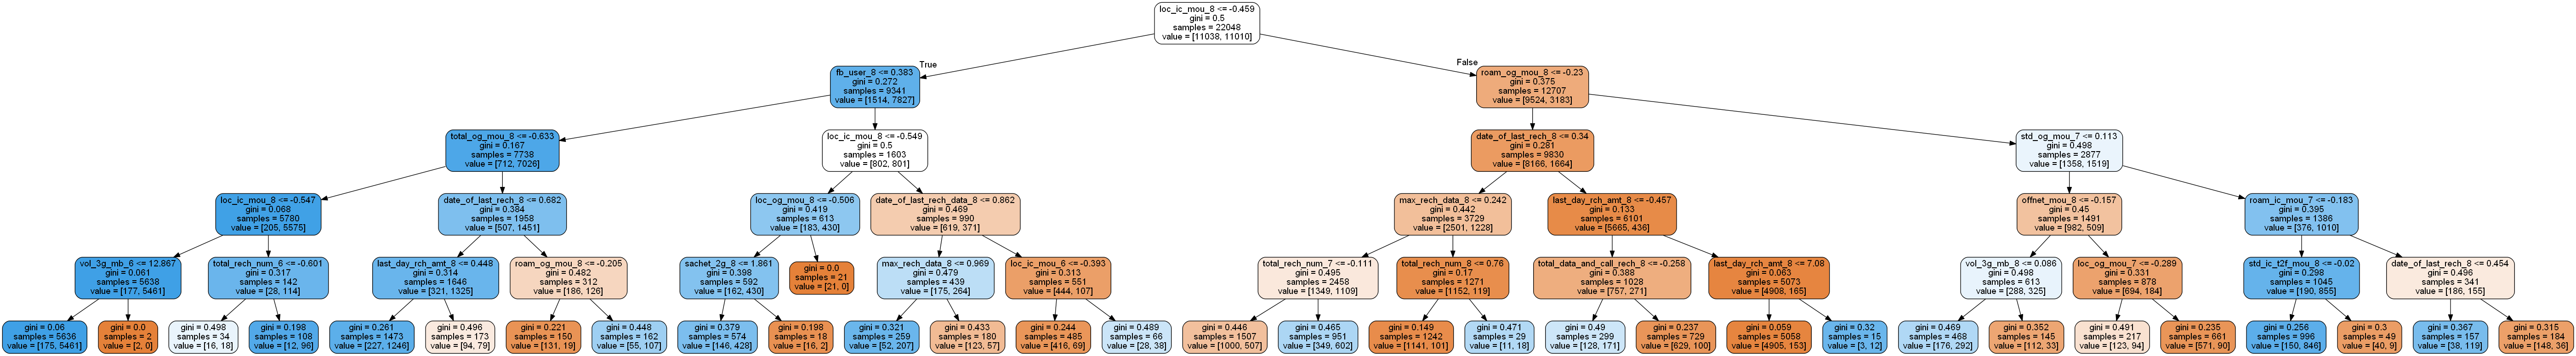

In [139]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [140]:
# Capturing the feature importances from the tree model properties into a dataframe and seleting the top 10 features
feature_importance = dt_default.feature_importances_
fi = pd.concat([pd.DataFrame(features), pd.DataFrame(feature_importance)], axis = 1)
fi.columns = ['Features','Importance']
fi_sorted = fi.loc[fi['Importance']>0].sort_values(by=['Importance'],ascending=False)
fi_sorted_top10 = fi_sorted.head(10)
fi_sorted_top10

,Features,Importance
65,loc_ic_mou_8,0.57
14,roam_og_mou_8,0.09
95,date_of_last_rech_8,0.07
122,fb_user_8,0.07
104,max_rech_data_8,0.04
40,std_og_mou_7,0.03
98,last_day_rch_amt_8,0.02
53,total_og_mou_8,0.02
88,total_rech_num_7,0.02
101,date_of_last_rech_data_8,0.01


In [235]:
#Most of the Indicators are either features for the action phase (August) or 2nd half of the good phase (July).
#Local Incoming minutes of usage in action phase has more importance than that of all the other features added together. This tell us that customers not receiving local incoming calls are most likely to churn soon.
#Costly Roaming charges(both incoming and outgoing) is an important criteria for churn. Attractive roaming packs may cause a customer to think twice before leaving the service provider.#
